In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
traffic_df=pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [80]:
traffic_df.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [81]:
traffic_df.shape

(48204, 9)

In [82]:
traffic_df.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

In [83]:
traffic_df['date_time'] = pd.to_datetime(traffic_df['date_time'])
traffic_df.dtypes

holiday                        object
temp                          float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
traffic_volume                  int64
dtype: object

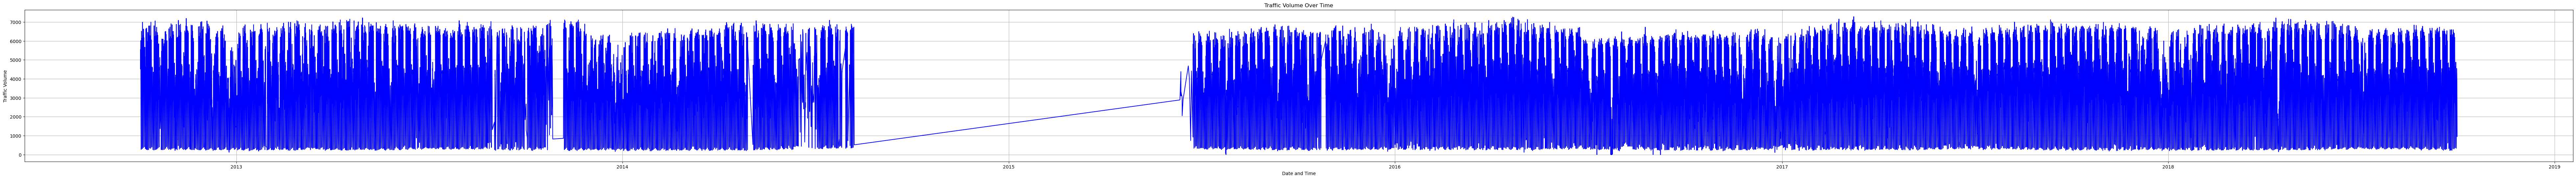

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

#convert 'date_time' to datetime format
#traffic_df['date_time'] = pd.to_datetime(traffic_df['date_time'])

date_series = traffic_df['date_time']
traffic_volume_series = traffic_df['traffic_volume']

# Plotting
plt.figure(figsize=(100, 6))
plt.plot(date_series, traffic_volume_series, color='blue', linestyle='-')
plt.title('Traffic Volume Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()


### Due to the missing data issue, we only use data after 2015 for our anlaysis 

In [85]:
newtraffic_df = traffic_df[traffic_df['date_time'].dt.year > 2015]
newtraffic_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
20344,New Years Day,265.94,0.0,0.0,90,Haze,haze,2016-01-01 00:00:00,1513
20345,New Years Day,265.94,0.0,0.0,90,Snow,light snow,2016-01-01 00:00:00,1513
20346,NaN,266.00,0.0,0.0,90,Snow,light snow,2016-01-01 01:00:00,1550
20347,NaN,266.01,0.0,0.0,90,Snow,light snow,2016-01-01 03:00:00,719
20348,NaN,264.80,0.0,0.0,90,Clouds,overcast clouds,2016-01-01 04:00:00,533


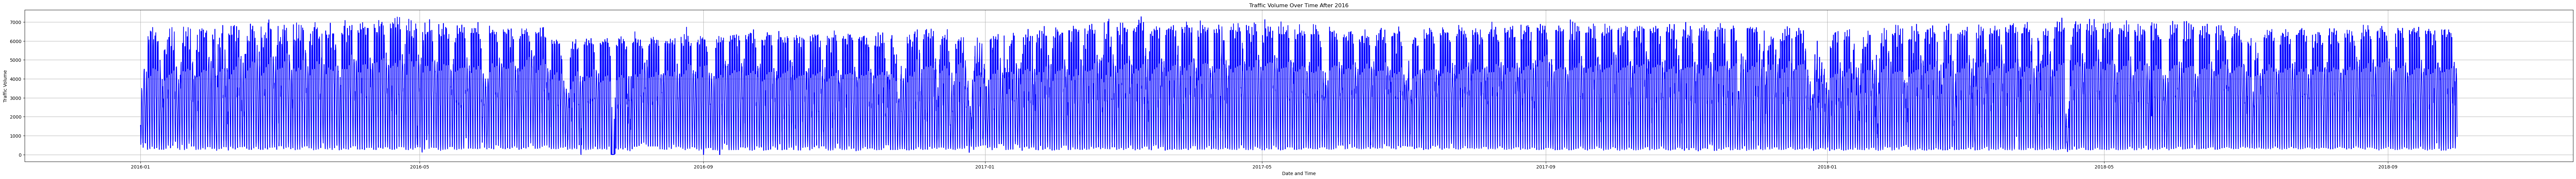

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

date_series = newtraffic_df['date_time']
traffic_volume_series = newtraffic_df['traffic_volume']

# Plotting data after 2016
plt.figure(figsize=(100, 6))
plt.plot(date_series, traffic_volume_series, color='blue', linestyle='-')
plt.title('Traffic Volume Over Time After 2016')
plt.xlabel('Date and Time')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

In [87]:
newtraffic_df.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

### Check Stationary or not

In [88]:
from statsmodels.tsa.stattools import adfuller

traffic_volume_series = newtraffic_df['traffic_volume']

# Run ADF test
adf_result = adfuller(traffic_volume_series)

# Print the results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -20.23267579072718
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


### The result shows Dataset is stationary.


<Figure size 1200x500 with 0 Axes>

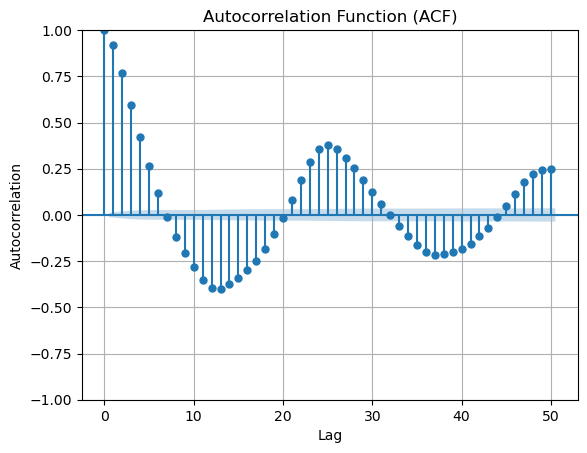

<Figure size 1200x500 with 0 Axes>

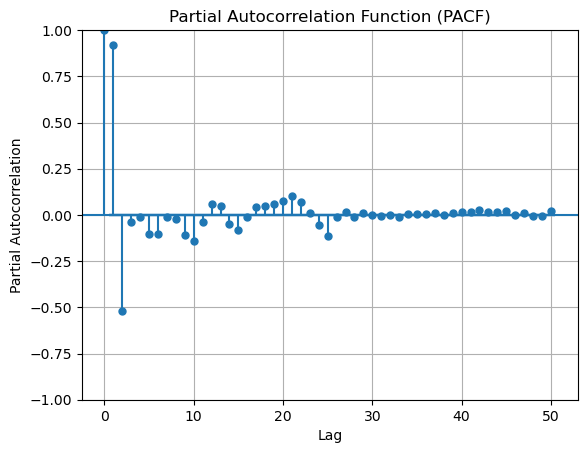

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

traffic_volume_series = newtraffic_df['traffic_volume']

# Plot ACF
plt.figure(figsize=(12, 5))
plot_acf(traffic_volume_series, lags=50, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Plot PACF
plt.figure(figsize=(12, 5))
plot_pacf(traffic_volume_series, lags=50, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()


### Check seasonality 

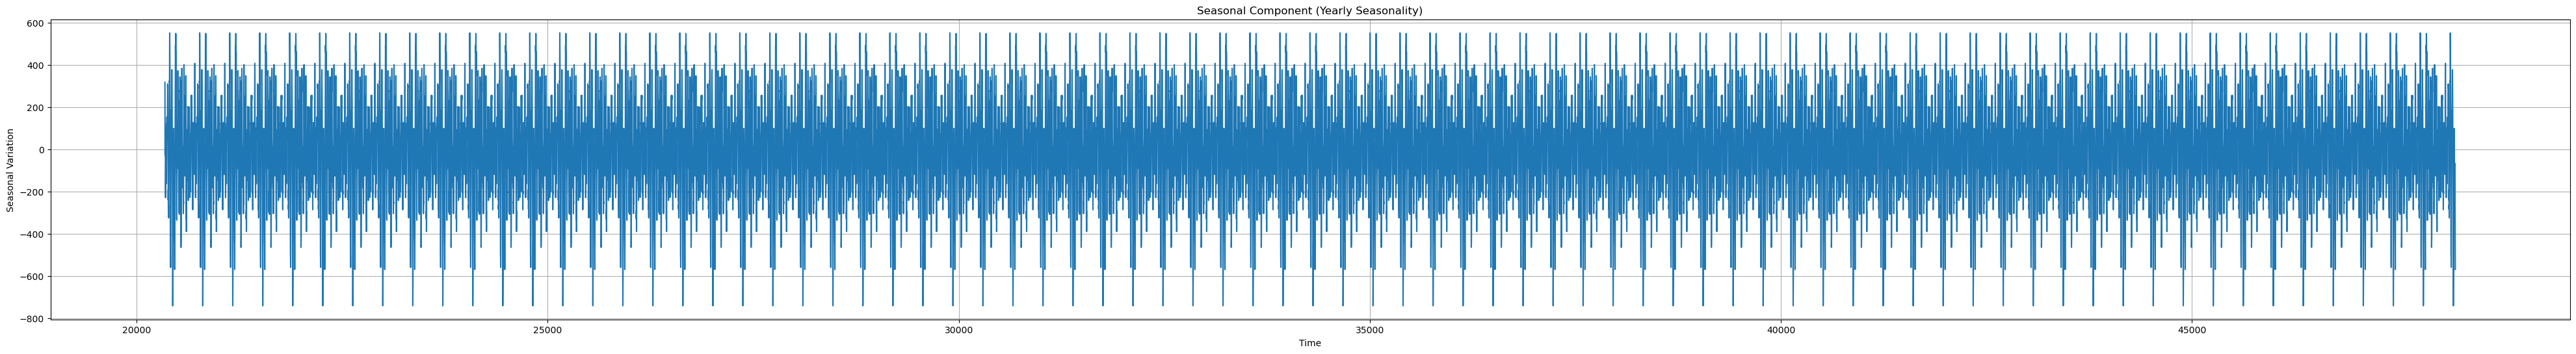

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

traffic_volume_series = newtraffic_df['traffic_volume']

# Perform seasonal decomposition
result = seasonal_decompose(traffic_volume_series, model='additive', period=365)  # Assuming yearly data

# Plot the seasonal component
plt.figure(figsize=(50, 6))
plt.plot(result.seasonal)
plt.title('Seasonal Component (Yearly Seasonality)')
plt.xlabel('Time')
plt.ylabel('Seasonal Variation')
plt.grid(True)
plt.show()

### Based on ACF anf PACF, I choose the AR(1)model 

### Model 1: Fit a AR(1)model

                               SARIMAX Results                                
Dep. Variable:         traffic_volume   No. Observations:                38563
Model:                 ARIMA(1, 0, 0)   Log Likelihood             -314019.007
Date:                Wed, 10 Apr 2024   AIC                         628044.015
Time:                        17:37:59   BIC                         628069.695
Sample:                             0   HQIC                        628052.157
                              - 38563                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3260.9404     53.866     60.538      0.000    3155.365    3366.515
ar.L1          0.9085      0.003    318.712      0.000       0.903       0.914
sigma2      6.925e+05   3591.346    192.831      0.0

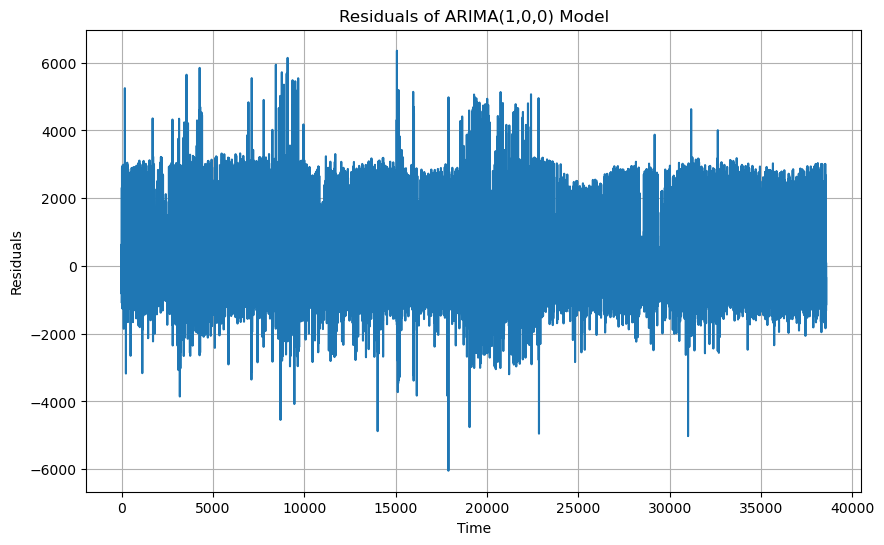

In [98]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


traffic_volume_series = traffic_df['traffic_volume']

# Splitting data into training and testing sets
train_data, test_data = train_test_split(traffic_volume_series, test_size=0.2, shuffle=False)

# Fit ARIMA(1,0,0) model
order = (1, 0, 0)
model = ARIMA(train_data, order=order)
arima_model = model.fit()

# Summary of the model
print(arima_model.summary())

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(arima_model.resid)
plt.title('Residuals of ARIMA(1,0,0) Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()



## Calculate MAE MSE RMSE of the model1:

Mean Squared Error (MSE): 29054.598897722255
Root Mean Squared Error (RMSE): 170.4540961599992
Mean Absolute Error (MAE): 121.50186134737567


C:\Users\Xiwen\AppData\Local\Temp\ipykernel_16472\392966404.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtraffic_df['traffic_volume'] = pd.to_numeric(newtraffic_df['traffic_volume'], errors='coerce')
C:\Users\Xiwen\AppData\Local\Temp\ipykernel_16472\392966404.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtraffic_df.dropna(inplace=True)
c:\Users\Xiwen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Us

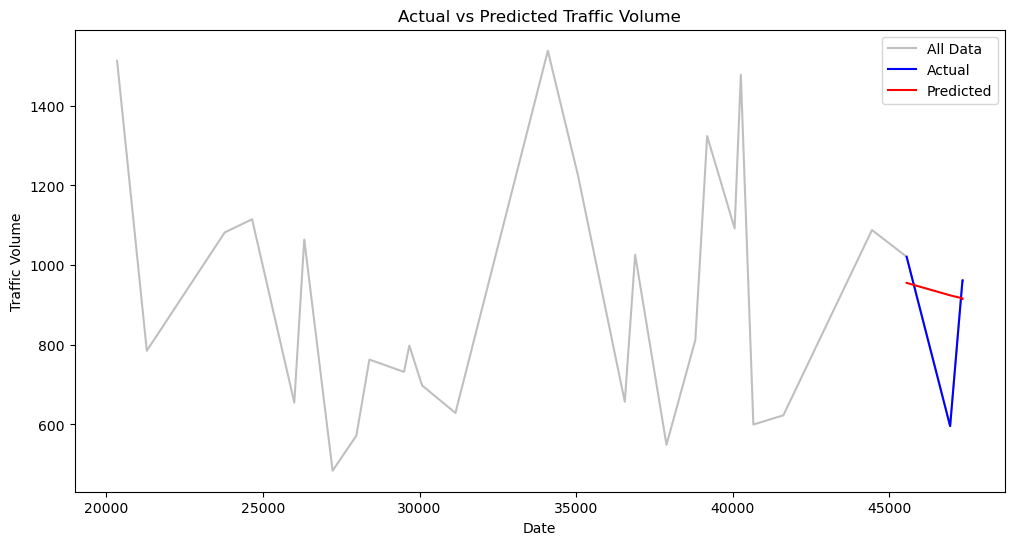

In [103]:

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt

traffic_df['date_time'] = pd.to_datetime(traffic_df['date_time'])

# Convert 'traffic_volume' column to numeric
newtraffic_df['traffic_volume'] = pd.to_numeric(newtraffic_df['traffic_volume'], errors='coerce')

# Remove rows with missing values
newtraffic_df.dropna(inplace=True)

# Calculate the index to split the data (90% for training and 10% for testing)
split_index = int(len(newtraffic_df) * 0.9)

# Split the data into training and testing sets
train_data = newtraffic_df.iloc[:split_index]
test_data = newtraffic_df.iloc[split_index:]

# Fit the ARIMA model
p, d, q = 1, 0, 0 
arima_model = ARIMA(train_data['traffic_volume'], order=(p, d, q))
arima_result = arima_model.fit()

# Make predictions on the testing data
predictions = arima_result.predict(start=split_index, end=len(newtraffic_df)-1, typ='levels')

# Calculate evaluation metrics
mse = mean_squared_error(test_data['traffic_volume'], predictions)
rmse = sqrt(mse)
mae = mean_absolute_error(test_data['traffic_volume'], predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

# Plot actual vs predicted values along with all points
plt.figure(figsize=(12, 6))
plt.plot(newtraffic_df.index, newtraffic_df['traffic_volume'], label='All Data', color='gray', alpha=0.5)
plt.plot(test_data.index, test_data['traffic_volume'], label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Traffic Volume')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


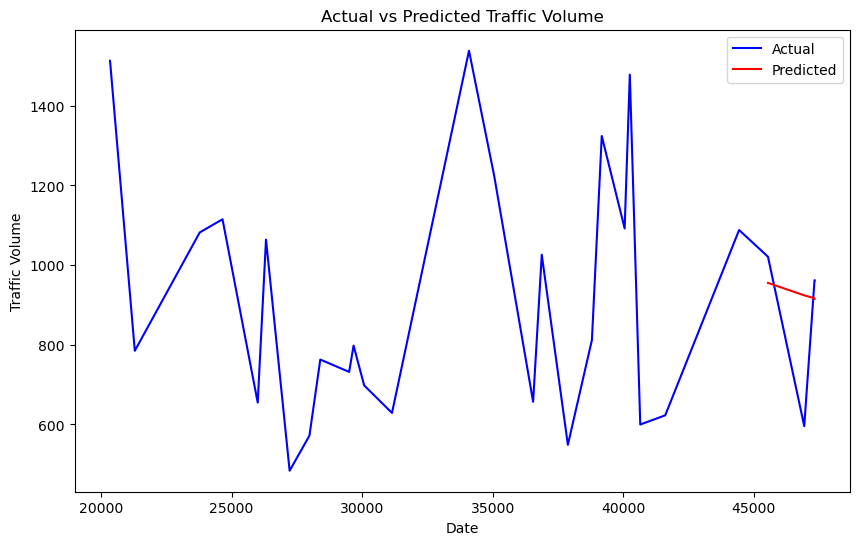

In [104]:

# Plot actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(newtraffic_df.index, newtraffic_df['traffic_volume'], label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Traffic Volume')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


### Model 2:  AUTO ARIMA model (Best model:  ARIMA(5,0,3)(0,0,0)[0] intercept)

In [24]:
! pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/18/ec/f47a721071d084d6c2b6783eb8d058b964b1450cb708d920d0d792f42001/Cython-3.0.10-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   --- ------------------------------------ 61.4/614.7 kB 1.1 MB/s eta 0:00:01
   ------------------------- -------------- 389.1/614.7 kB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.8 MB 16.8 MB/s eta 0:00:01
   ------------------------------- -------- 2.2/2.8 MB 23.0 MB/s eta 0:00:01
   ---------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [28]:
traffic_df['date_time'] = pd.to_datetime(traffic_df['date_time'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=442845.412, Time=3.92 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=538496.652, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=450179.003, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=504816.558, Time=2.87 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=442891.096, Time=2.26 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=443021.473, Time=1.98 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=442823.576, Time=5.09 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=14.31 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=442215.673, Time=23.11 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=442855.765, Time=6.22 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=442189.383, Time=25.52 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=442862.340, Time=2.47 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=442206.332, Time=25.01 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=442235.055, Time=23.94 sec
 ARIMA(

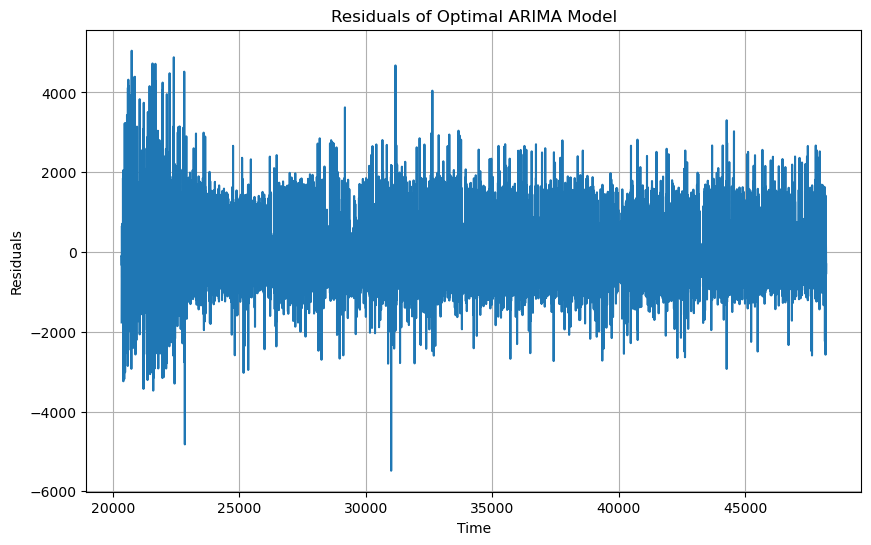

In [67]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt

traffic_volume_series = newtraffic_df['traffic_volume']

# Finding the best ARIMA model
arima_model = auto_arima(traffic_volume_series, seasonal=False, trace=True)

# Print the summary of the optimal model
print(arima_model.summary())

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(arima_model.resid())
plt.title('Residuals of Optimal ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [68]:
# Summary of the model
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                27860
Model:               SARIMAX(5, 0, 3)   Log Likelihood             -219714.632
Date:                Wed, 10 Apr 2024   AIC                         439449.264
Time:                        16:31:42   BIC                         439531.614
Sample:                             0   HQIC                        439475.781
                              - 27860                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    530.5518     25.841     20.531      0.000     479.904     581.199
ar.L1          1.9791      0.043     46.178      0.000       1.895       2.063
ar.L2         -2.2171      0.082    -26.951      0.0

## Calculate MAE MSE RMSE of the model2:

In [74]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


# Convert 'traffic_volume' column to numeric
newtraffic_df['traffic_volume'] = pd.to_numeric(newtraffic_df['traffic_volume'], errors='coerce')

# Remove rows with missing values
newtraffic_df.dropna(inplace=True)

# Calculate the index to split the data (90% for training and 10% for testing)
split_index = int(len(newtraffic_df) * 0.9)

# Split the data into training and testing sets
train_data = newtraffic_df.iloc[:split_index]
test_data = newtraffic_df.iloc[split_index:]

# Fit the ARIMA model
p, d, q = 5, 0, 3  # fit based on the best AIC score model
arima_model = ARIMA(train_data['traffic_volume'], order=(p, d, q))
arima_result = arima_model.fit()

# Make predictions on the testing data
predictions = arima_result.predict(start=split_index, end=len(newtraffic_df)-1, typ='levels')

# Calculate evaluation metrics
mse = mean_squared_error(test_data['traffic_volume'], predictions)
rmse = sqrt(mse)
mae = mean_absolute_error(test_data['traffic_volume'], predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 32774.0837362531
Root Mean Squared Error (RMSE): 181.03613930995408
Mean Absolute Error (MAE): 156.35268820812288


C:\Users\Xiwen\AppData\Local\Temp\ipykernel_16472\3731588548.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtraffic_df['traffic_volume'] = pd.to_numeric(newtraffic_df['traffic_volume'], errors='coerce')
C:\Users\Xiwen\AppData\Local\Temp\ipykernel_16472\3731588548.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtraffic_df.dropna(inplace=True)
c:\Users\Xiwen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. 

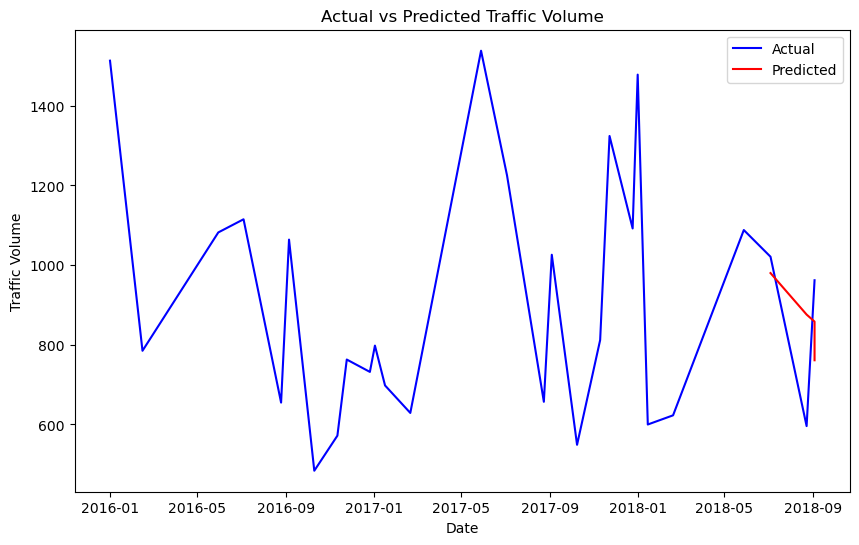

In [76]:
import matplotlib.pyplot as plt

# Combine training, testing, and predicted data for plotting
combined_data = pd.concat([train_data, test_data])
combined_index = combined_data.index

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(combined_index, combined_data['traffic_volume'], label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Traffic Volume')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()
